## Parameter space Figure

Code to create figures which show the unique parameter space covered by my dataset

In [42]:
import numpy as np
from numpy import trapz
import random
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit as curve_fit
from scipy.stats import norm,binned_statistic
import scipy.integrate as integrate
from scipy.stats import norm
from astropy.io import ascii, fits
from astropy import wcs
from pymoc.util.catalog import catalog_to_moc
from scipy.stats import norm,kstest

from astropy.table import Table,vstack,Column,join,MaskedColumn
from astropy.cosmology import WMAP9 as cosmo
import astropy.units as u
from astropy.coordinates import SkyCoord,match_coordinates_sky

import emcee
import time
import corner
import herschelhelp
from matplotlib.colors import LogNorm
from lifelines import KaplanMeierFitter
from herschelhelp import image_plotting
from herschelhelp_internal.utils import inMoc,flux_to_mag
import pymoc
from pymoc.io.fits import read_moc_fits

from astropy.io import registry
from astropy.table.info import serialize_method_as

In [53]:
def sf_luminosity_function(L):
    #returns the luminosity function from Mauch and Sadler 2007
    C = 10**(-2.83)
    P0 = 10**(21.18)
    sig = 0.6
    alpha = 1.02
    
    N = C*(L/P0)**(1-alpha) * np.exp(-0.5*((np.log10(1+L/P0)/sig)**2))
    return(N)

In [50]:
#set plotting atributes

font = {'family' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

In [8]:
# list of different surveys and there frequency, area, depth and resolution

#survey names
survey_names = ['This Work','VLA-COSMOS','LOTSS DR1','MIGHTEE']
#frequency in MHz
frequency = np.array([150,3000,150,1400])
#one sigma depth in uJy
depth = np.array([20,2.3,110,1])
#area in sq degrees
area = np.array([7,2,424,20])
#resolution in "
resolution = np.array([6,0.75,6,6])

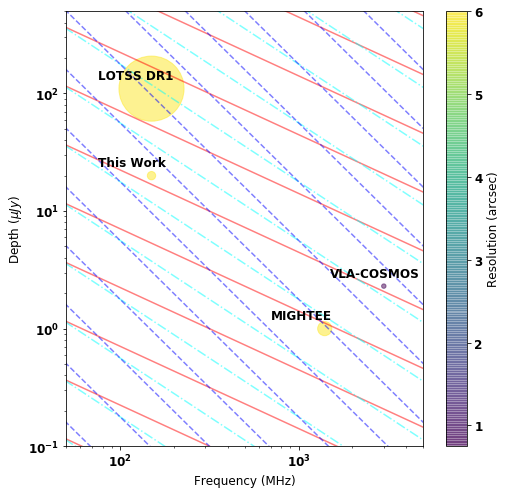

In [142]:
# plot the different surveys 
fig, ax = plt.subplots(figsize=(8,8))

#plot lines for different spectral index
x = np.arange(1,10000,1)
styles = ['solid','dashdot','dashed']
colors = ['red','cyan','blue']
for n,index in enumerate([-0.7,-1.0,-1.5]):
    for c in 10**(np.arange(-3,10,0.5)+0.25):
        y = x**index*c
        plt.plot(x,y,c=colors[n],linestyle=styles[n],alpha=0.5)

x = frequency
y = depth
c = resolution
s = area*10

scat = ax.scatter(x,y,c=c,s=s,alpha=0.5)

for n,txt in enumerate(survey_names):
    ax.annotate(txt,(x[n]*0.5,y[n]*1.2))

cbar = fig.colorbar(scat)
cbar.ax.set_ylabel('Resolution (arcsec)')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(50,5000)
ax.set_ylim(0.1,500)
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Depth ($\mu Jy$)')

plt.show()

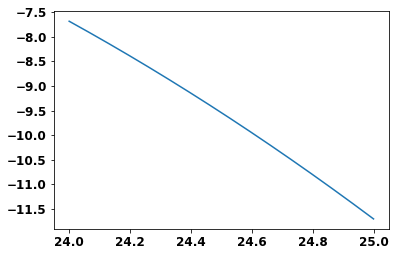

7908714058473666.0

In [118]:
x = 10**np.arange(24,25,0.001)
y = sf_luminosity_function(x)

plt.plot(np.log10(x),np.log10(y))
plt.show()

np.trapz(y,x,dx=10**20)

In [133]:
#work out volume observed out to redshift=1 
#area of teh sky is 41253
sky_area = 41253
volume = cosmo.comoving_volume(1).value

#work out the number of Bright/massive galaxies that should be found in each survey on average
x = 10**(np.arange(24,25,0.001))
#need to normalise by the bins in magnitude which is equivalent to 0.4 dex in log(flux space)
y = sf_luminosity_function(x)
tot = np.trapz(y,x,dx=10**22)

survey_area = 7
num_bright = tot*volume*survey_area/sky_area 
print(num_bright)

178.99464359151725


In [129]:
test = np.array([0.265,0.667,1.67,4.21,10.6,26.5,66.7])
np.log10(test)

array([-0.57675413, -0.17587417,  0.22271647,  0.6242821 ,  1.02530587,
        1.42324587,  1.82412583])